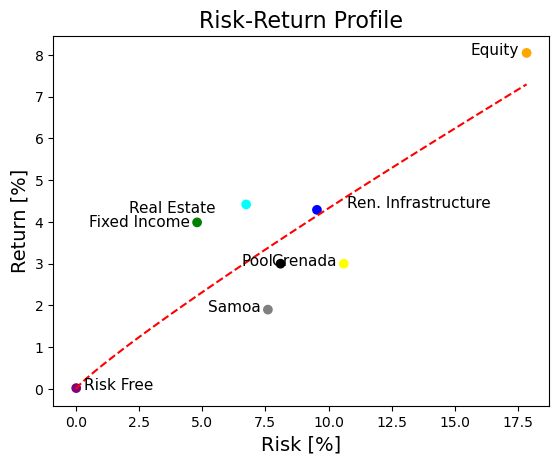

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


# Example data
risk = np.array([0.02, 9.54, 4.80, 6.74, 17.83, 10.6, 7.6, 8.1])  # Avoid zero to prevent issues
returns = np.array([0.02, 4.29, 3.99, 4.42, 8.05, 3.0, 1.9, 3.0])
labels = ["Risk Free", "Ren. Infrastructure", "Fixed Income", "Real Estate", "Equity", 'Grenada', 'Samoa', 'Pool']

# Define the power law function
def power_law_func(x, a, b):
    return a * x**b

# Fit the power law function to the data
params, _ = curve_fit(power_law_func, risk, returns, maxfev=10000)
a, b = params

# Generate smooth values for the trendline
smooth_risk = np.linspace(0, max(risk), 100)
smooth_trendline = power_law_func(smooth_risk, a, b)

plt.scatter(risk, returns, color=['purple', 'blue', 'green', 'cyan', 'orange', 'yellow', 'grey', 'black'])

offsets = [
    (0.3, -0.05),  # Risk Free (move right and slightly down)
    (1.2, 0.05),  # Fixed Income (move left and up)
    (-0.3, -0.1),   # Real Estate (move right and up)
    (-1.2, -0.2), # Ren. Infrastructure (move left and down)
    (-0.3, -0.05),
    (-0.3, -0.05),
    (-0.3, -0.05),
    (-0.3, -0.05)      # Equity (move up)
]

# Plot labels with specified offsets
for i, label in enumerate(labels):
    if i // 2 ==0:
        plt.text(risk[i] + offsets[i][0], returns[i] + offsets[i][1], label, fontsize=11,
                 ha='left')
    else:
        plt.text(risk[i] + offsets[i][0], returns[i] + offsets[i][1], label, fontsize=11,
                 ha='right')
    
# Plot the smooth power law trendline
plt.plot(smooth_risk, smooth_trendline, color='red', linestyle='--', label=f'Power Law Trendline: y = {a:.2f} * x^{b:.2f}')

# Add labels and title
plt.xlabel("Risk [%]", fontsize=14)
plt.ylabel("Return [%]", fontsize=14)
plt.title("Risk-Return Profile", fontsize=16)
#plt.legend()

plt.show()



C:\Users\kaibe\AppData\Local\Temp\ipykernel_16412\1570960249.py:19: RuntimeWarning: invalid value encountered in divide
  plt.plot(arr, ex_post / arr)


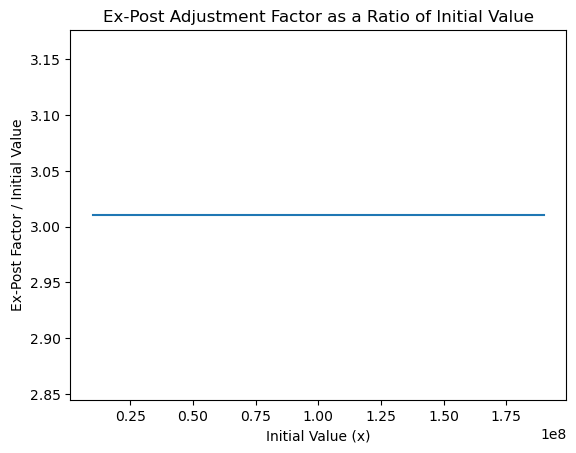

In [30]:
def an(y, n):
    a = (1 - (1 + y)**(-n)) / y
    return a

def c4(d, i, e, x, t, n):
    X = ((1 + d) / (1 + i))**t * (an(i, n) / an(e, n)) * x
    return X

i = 0.057
e = 0.07
n = 20
d = 3
t = 9/12

arr = np.arange(0,200000000, 10000000)
ex_post = c4(d, i, e, arr, t, n)

# Plot the ratio ex_post / arr
plt.plot(arr, ex_post / arr)
plt.xlabel("Initial Value (x)")
plt.ylabel("Ex-Post Factor / Initial Value")
plt.title("Ex-Post Adjustment Factor as a Ratio of Initial Value")
plt.show()

In [32]:
ex_post = c4(d, i, e, 1, t, n)
i = 0.057
e = 0.07
ane = an(e,n)
ani = an(i,n)
print(ani/ane)
print(((1+d)/(1+i))**t)

1.109548102796692
2.7132433859995415
